<a href="https://colab.research.google.com/github/shivannadm/Data_Science_path/blob/main/Lab_Exercise_05_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NASSCOM Internship 2024-2025
**Lab Exercise 05 Data Science.**

# **Lab 01:** Setting Up the environment

    Install anaconda(or you can do it on Google colab itself)

  If not clear follow the lab exercise 04 for setting up the environment: https://github.com/shivannadm/Data_Science_path/blob/main/Lab_Exercise_04_November072024_Data_Science_Basics.ipynb

# **Lab 2:** Understand the basic of supervised learning

**objective:** Familiarize yourself with the concept of supervised learning


**What is Supervised Learning?**

Supervised learning is a type of machine learning where the algorithm learns from a labeled dataset.

* Input: Features (independent variables)
* Output: Labels (dependent variables)
* Goal: Learn the relationship between input and output to predict outcomes for unseen data.

**2. Key Learning Areas**

**Data Handling:** Understanding how labeled datasets are structured and why they are critical.

**Algorithm Insights:** Exploring popular supervised learning algorithms like Linear Regression, Decision Trees, SVMs, and Neural Networks.

**Model Training and Evaluation:** Learning how to train models and measure their performance using metrics like accuracy, precision, and recall.


**3. Practical Vision**
Supervised learning is at the heart of many technological advancements:
* Healthcare: Disease diagnosis using patient data.
* Finance: Fraud detection systems.
* Retail: Predicting customer behavior for personalized marketing.
* Autonomous Systems: Assisting in tasks like speech recognition and image classification.


# **lab 3:** Linear regression Implementation

**Objective:** Implement a basic regression model

**Broad Vision** Linear regression is one of the simplest yet most powerful algorithms in supervised learning. It models the relationship between a dependent variable (output) and one or more independent variables (inputs) by fitting a straight line.

**Purpose:** Predict a continuous outcome based on input features.

**Applications:** Predicting house prices, sales forecasting, and stock market trends. Steps for the Lab

Understand the Linear Regression Model The equation for simple linear regression is:

<code>
𝑦 = 𝑚𝑥 + 𝑐 + 𝜖 </code>

Where:

* y: Predicted value (dependent variable)
* x: Input value (independent variable)
* m: Slope of the line (weights)
* c: Intercept
* ϵ: Error term For multiple variables:


<code>
𝑦 = 𝑤1𝑥1 + 𝑤2𝑥2 + ⋯ + 𝑤𝑛𝑥𝑛 ​+ c + ϵ</code>

**2. Dataset**

Use a sample dataset (e.g., predicting house prices based on features like area and number of bedrooms).
Example dataset:<pre>
Area (sq ft)	Bedrooms	Price ($)
1500	         3	      300,000
1700	         4	      350,000
1200	         2	      220,000</pre>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.DataFrame({
    'Area': [1500, 1700, 1200, 2000, 1000],
    'Bedrooms': [3, 4, 2, 5, 1],
    'Price': [300000, 350000, 220000, 400000, 180000]
})

# Features and target
X = data[['Area', 'Bedrooms']]  # Independent variables
y = data['Price']  # Dependent variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<code>X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)</code>
Explanation of test_size and random_state:
**1. test_size**

**Purpose:** Determines the proportion of the dataset to be used as the test set.

**Value:**
* A float between 0 and 1 represents the fraction of
  data allocated to the test set.
  * 0.2 means 20% of the data will be used for testing.
* An integer specifies the exact number of test samples.

**Default:** If not specified, test_size defaults to 0.25 (25% of data).

**Example:**
If the dataset has 100 samples and test_size=0.2, 80 samples go to the training set (X_train and y_train), and 20 samples go to the test set (X_test and y_test).

**2. random_state**

*Purpose*: Ensures reproducibility of the train-test split by controlling the random number generator's seed.

*Value:*
* An integer value (e.g., 42) ensures the same split is produced every time the code runs.
* None (default): Each run will produce a different split due to the randomness.

**Why use random_state?**

When developing and debugging models, having a fixed random_state ensures consistent behavior and allows for repeatability of experiments.

**Why 42?**

It’s a common convention in programming (inspired by the book The Hitchhiker's Guide to the Galaxy where 42 is "the answer to life, the universe, and everything"). However, you can use any integer.


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 399999999.9999977
R^2 Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [   366.66666667 -36666.66666667]
Model Intercept: -146666.6666666661


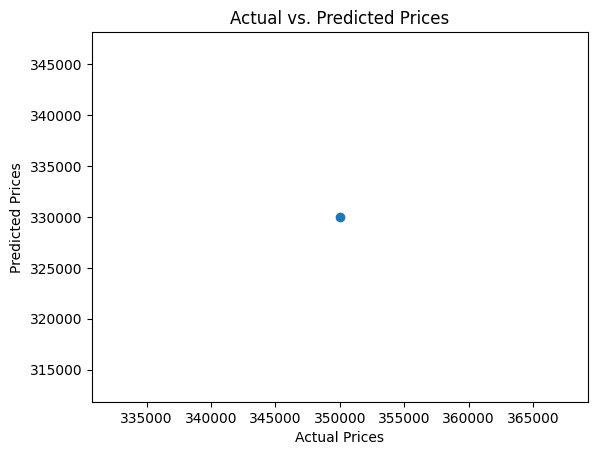

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [ ]:
# New house data: [Area, Bedrooms]
new_house = [[1800, 3]]  # Example input

# Predict the price
predicted_price = model.predict(new_house)
print("Predicted Price for New House:", predicted_price[0])

Predicted Price for New House: 403333.33333333296


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Lab 04:** Lab 04: Multiple Linear Regression
**Objective:** Extend linear regression to multiple features.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Example dataset for predicting house prices
data = pd.DataFrame({
    'Area': [1500, 1700, 1200, 2000, 1000, 2500],
    'Bedrooms': [3, 4, 2, 5, 1, 4],
    'Age': [10, 5, 20, 15, 25, 8],
    'Price': [300000, 350000, 220000, 400000, 180000, 450000]
})

# Features (independent variables) and target (dependent variable)
X = data[['Area', 'Bedrooms', 'Age']]  # Multiple features
y = data['Price']                      # Target variable

In [ ]:
# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  172.34042553 18297.87234043  2553.19148936]
Model Intercept: -74468.0851063832


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Display predictions and actual values
print("Predicted Prices:", y_pred)
print("Actual Prices:", y_test.values)

Predicted Prices: [264468.08510638 304468.08510638]
Actual Prices: [300000 350000]


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 1667836124.9434166
R-squared (R²): -1.6685377999094664


In [ ]:
# Example new data
new_house = [[1800, 3, 12]]  # [Area, Bedrooms, Age]

# Predict the price
predicted_price = model.predict(new_house)
print("Predicted Price for New House:", predicted_price[0])

Predicted Price for New House: 321276.59574468085


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Lab 05:** Logistic Regression for Classification

**Introduction to Logistic Regression**

Logistic Regression is a statistical method used for binary classification problems where the target variable has two possible outcomes, such as "yes" or "no," "0" or "1". Instead of predicting raw values, logistic regression predicts probabilities using the logistic (sigmoid) function:

<pre>
                            1
Sigmoid Function: σ(z) = ----------
                         1 + e^-z
</pre>

The model decision boundary is based on a threshold (commonly 0.5).

**Step 1: Import Necessary Libraries**

These libraries are essential for data manipulation, visualization, and modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Step 2: Load and Explore the Dataset**

Use a dataset with binary classification. You can use an open dataset like the Titanic survival dataset or generate a synthetic dataset.

In [4]:
# Load dataset
# Example: Titanic dataset from seaborn
data = sns.load_dataset('titanic')

# Select relevant columns
df = data[['age', 'fare', 'sex', 'survived']].dropna()

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # Encode 'sex' as 0 or 1

# Display the first few rows
print(df.head())

    age     fare  sex  survived
0  22.0   7.2500    0         0
1  38.0  71.2833    1         1
2  26.0   7.9250    1         1
3  35.0  53.1000    1         1
4  35.0   8.0500    0         0


**Step 3: Split the Data**

Divide the dataset into training and testing sets.

In [5]:
# Define features (X) and target (y)
X = df[['age', 'fare', 'sex']]
y = df['survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 571
Testing set size: 143


**Step 4: Train Logistic Regression Model**

Use the LogisticRegression class from scikit-learn.

In [6]:
# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Display coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [[-0.01835573  0.01281015  2.37028971]]
Intercept: [-1.1725499]


**Step 5: Evaluate the Model**

Make predictions and evaluate model performance.

Accuracy: 74.83%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        87
           1       0.68      0.68      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



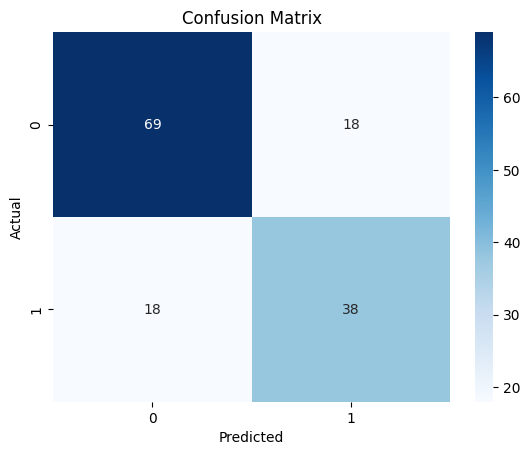

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

# Define the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=ListedColormap(('red', 'green')), edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Select two features for visualization
X_simple = X[['age', 'fare']]
plot_decision_boundary(X_simple, y, model)


**Summary**

1. Logistic regression is a fundamental binary classification algorithm.
2. It uses the sigmoid function to predict probabilities and assigns classes based on a threshold.
3. The key steps include data preparation, model training, and evaluation.
4. Use confusion matrices and classification reports to interpret the model's performance.

# **Lab 06:** Decision Trees
Objective: Implement a decision tree classifier

**Introduction to Decision Trees**

A decision tree is a flowchart-like tree structure where:

* Internal nodes represent features (or attributes),
* Branches represent decision rules, and
* Leaf nodes represent outcomes (class labels).

The algorithm splits data recursively based on criteria like Gini Impurity or Entropy (Information Gain), aiming to maximize homogeneity in each split.

In [13]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
# Step 2: Load and Explore the Dataset
# Load the Iris dataset
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Filter for binary classification (target 0 and 1)
df = df[df['target'] != 2]

# Display the first few rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [14]:
# Step 3: Split the Data
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 80
Testing set size: 20


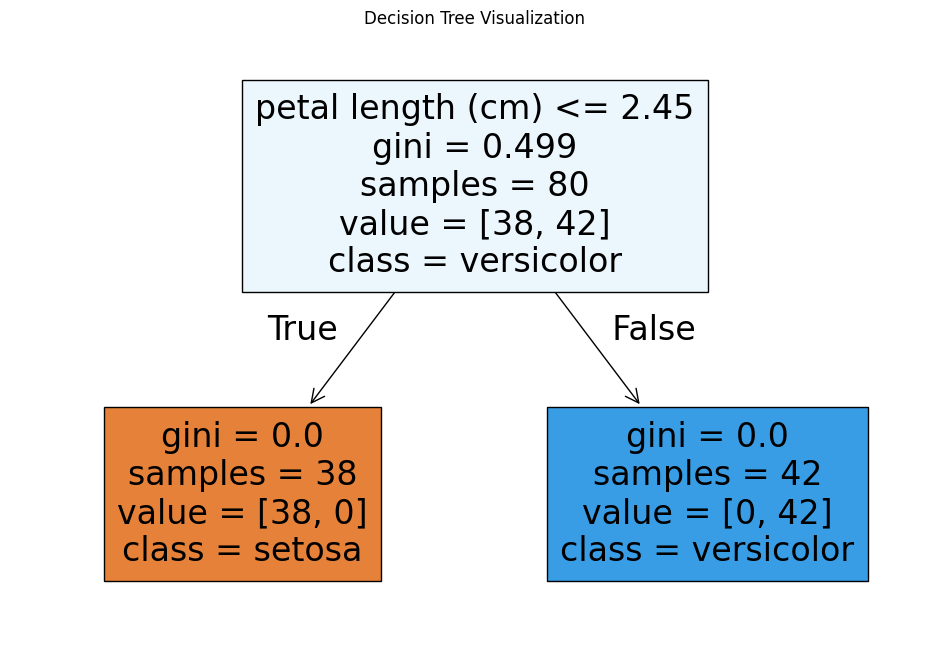

In [15]:
# Step 4: Train the Decision Tree Classifier
# Initialize and train the decision tree classifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Display tree structure
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=data.feature_names, class_names=data.target_names[:2], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



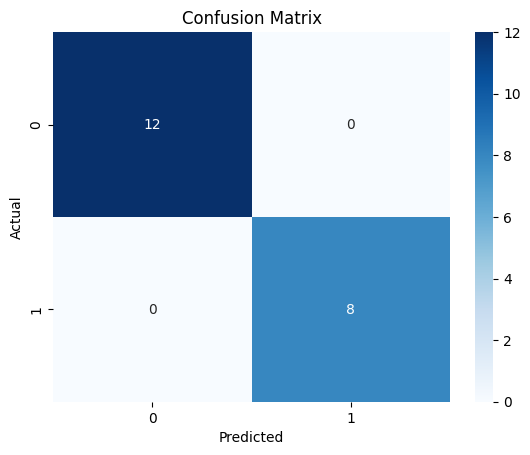

In [16]:
# Step 5: Evaluate the Model
# Make predictions
y_pred = tree_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [17]:
# Step 6: Tune the Model
# Hyperparameter tuning
tree_model_optimized = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4, random_state=42)
tree_model_optimized.fit(X_train, y_train)

# Evaluate the optimized model
y_pred_optimized = tree_model_optimized.predict(X_test)

# Accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {accuracy_optimized * 100:.2f}%")

Optimized Accuracy: 100.00%


Feature Importances:
             Feature  Importance
2  petal length (cm)         1.0
0  sepal length (cm)         0.0
1   sepal width (cm)         0.0
3   petal width (cm)         0.0


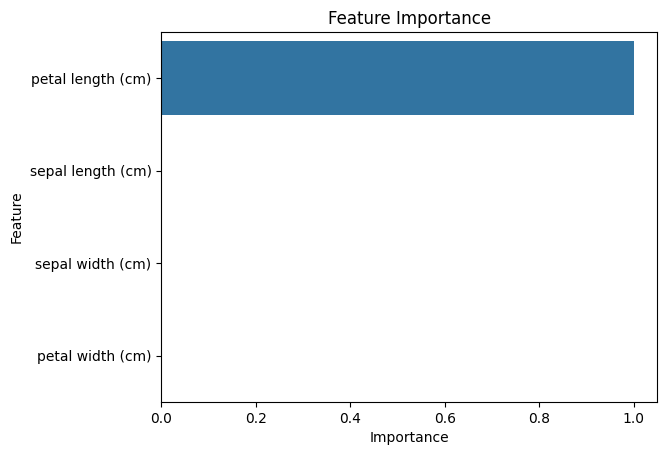

In [18]:
# Step 7: Feature Importance
# Feature importance
importance = tree_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': data.feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# **Lab 07:** Model Evaluate with Confusion Matrix
Objective: Evaluate a classification model using a confusion matrix.

**What is a Confusion Matrix?**

A confusion matrix is a table that describes the performance of a classification model by comparing predicted labels with actual labels.

For binary classification:
<pre>
              Predicted
            |  Yes  |  No  |
    Actual ----------------
      Yes   |   TP  |  FN  |
      No    |   FP  |  TN  |

</pre>
* True Positive (TP): Correctly predicted positive instances.
* True Negative (TN): Correctly predicted negative instances.
* False Positive (FP): Incorrectly predicted positive instances.
* False Negative (FN): Incorrectly predicted negative instances.

In [20]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [21]:
# Step 2: Train a Classification Model
# Load Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Use only two classes for binary classification
df = df[df['target'] != 2]

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Confusion Matrix:
[[12  0]
 [ 0  8]]


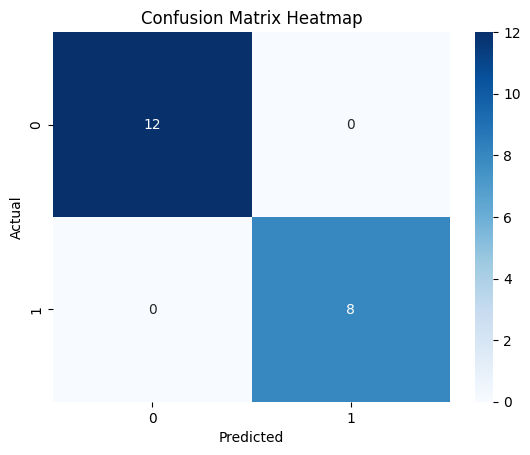

In [22]:
# Step 3: Generate the Confusion Matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [23]:
# Step 4: Interpret the Confusion Matrix
# Extract values from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [24]:
# Step 5: Display the Classification Report
# Generate classification report
report = classification_report(y_test, y_pred, target_names=data.target_names[:2])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



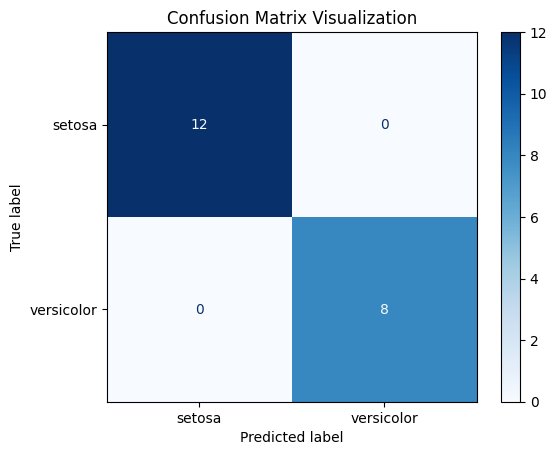

In [25]:
# Step 6: Visualize the Confusion Matrix Using ConfusionMatrixDisplay

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names[:2])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Visualization')
plt.show()

**Summary**

The confusion matrix provides insights into a model's performance:

* Accuracy: The proportion of correct predictions.
* Precision: The ratio of correctly predicted positive instances to total predicted positives.
* Recall: The ratio of correctly predicted positives to all actual positives.
* F1-Score: A harmonic mean of precision and recall.

# **Lab 08:** Support Vector Machines (SVM)
Objective: Implement a support vector machine for classification.

**Introduction to SVM**

Support Vector Machines (SVM) is a supervised learning algorithm primarily used for classification. It works by finding the hyperplane that best separates data points from different classes in a high-dimensional space.

Key concepts:

* Hyperplane: A decision boundary separating different classes.
* Support Vectors: Data points closest to the hyperplane that influence its orientation and position.
* Kernel Trick: Maps data to higher dimensions for non-linear separability.


In [26]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

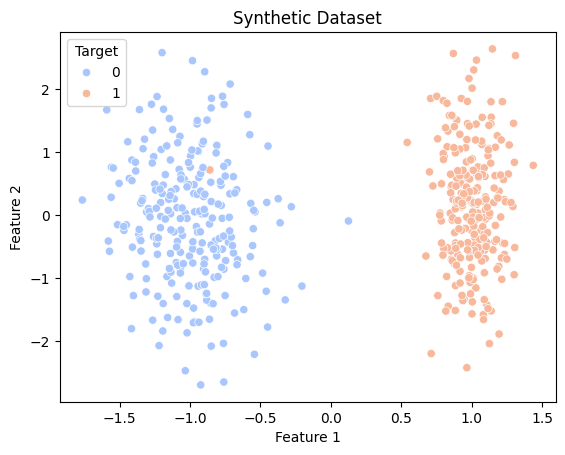

In [34]:
# Step 2: Generate or Load a Dataset
# Generate a synthetic dataset
X, y = make_classification(n_samples=500, n_features=2, n_classes=2,
                            n_clusters_per_class=1, n_informative=1, n_redundant=0, n_repeated=0, # added parameters
                            random_state=42)

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Visualize the dataset
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Target', data=df, palette='coolwarm')
plt.title('Synthetic Dataset')
plt.show()

In [35]:
# Step 3: Split the Data
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 400
Testing set size: 100


In [36]:
# Step 4: Train an SVM Model
# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Display support vectors
print(f"Number of support vectors: {len(svm_model.support_vectors_)}")

Number of support vectors: 10


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



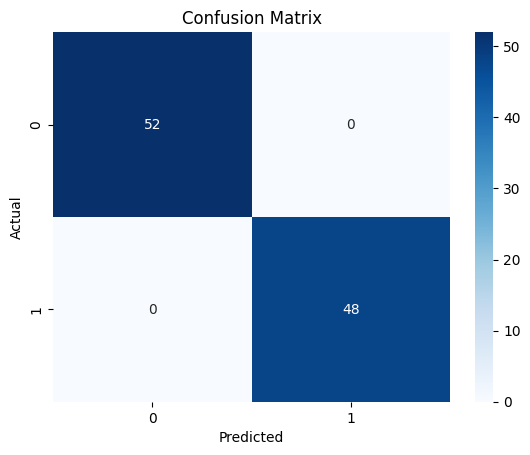

In [37]:
# Step 5: Evaluate the Model
# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

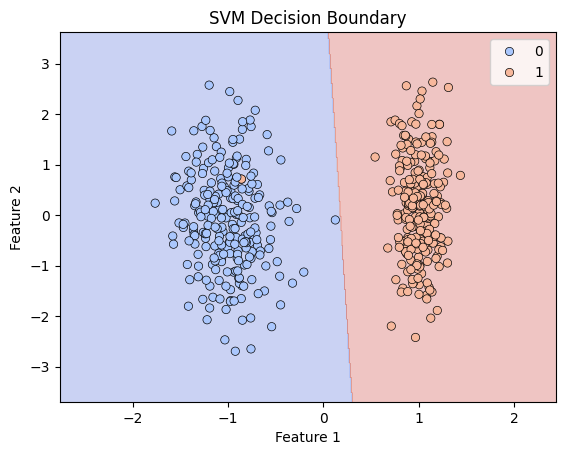

In [38]:
# Step 6: Visualize the Decision Boundary
# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Visualize decision boundary
plot_decision_boundary(X, y, svm_model)

Accuracy with RBF Kernel: 1.0


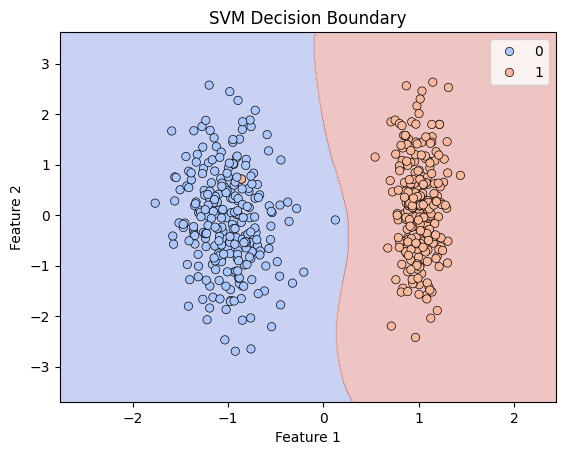

In [39]:
# Step 7: Try Different Kernels
# Train an SVM with a radial basis function (RBF) kernel
svm_model_rbf = SVC(kernel='rbf', random_state=42)
svm_model_rbf.fit(X_train, y_train)

# Evaluate the RBF kernel
y_pred_rbf = svm_model_rbf.predict(X_test)
print("Accuracy with RBF Kernel:", accuracy_score(y_test, y_pred_rbf))

# Visualize the decision boundary with RBF kernel
plot_decision_boundary(X, y, svm_model_rbf)

**Summary**

1. SVM is a powerful classification model that works well for both linear and non-linear datasets.
2. The kernel trick allows SVM to handle non-linearly separable data by mapping it to higher dimensions.
3. Visualization of the decision boundary helps understand how SVM separates classes.
4. Experimenting with different kernels (<code>linear</code>, <code>rbf</code>, <code>poly</code>) can improve model performance for complex datasets.

# **Lab 09:** K-Neares Neighbor(KNN)
Objective: Implement the K-Neares Neighbor algorithm for classification.

**Introduction to KNN**

The K-Nearest Neighbor algorithm is a simple, non-parametric, and instance-based learning method:

* Instance-based: It makes predictions based on the closest training samples.
* K: The number of neighbors to consider for making a prediction.
* Distance Metric: Typically uses Euclidean distance to determine the nearest neighbors.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

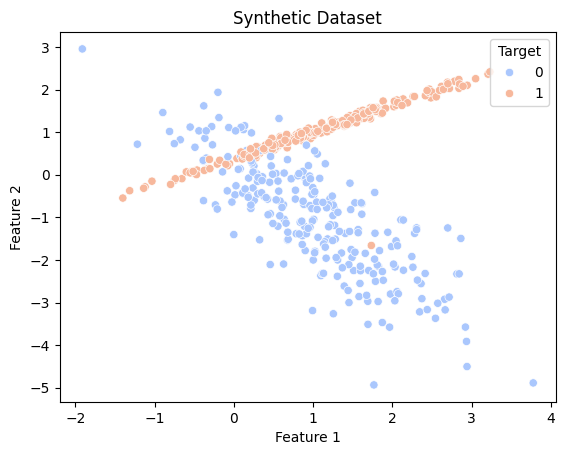

In [42]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1,
                            n_informative=2, n_redundant=0, n_repeated=0,  # Explicitly set these parameters
                            random_state=42)

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Visualize the dataset
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Target', data=df, palette='coolwarm')
plt.title('Synthetic Dataset')
plt.show()

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 400
Testing set size: 100


In [44]:
# Initialize and train the KNN model
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

print(f"Model trained with k={k} neighbors.")

Model trained with k=5 neighbors.


Accuracy: 97.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        51
           1       0.94      1.00      0.97        49

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



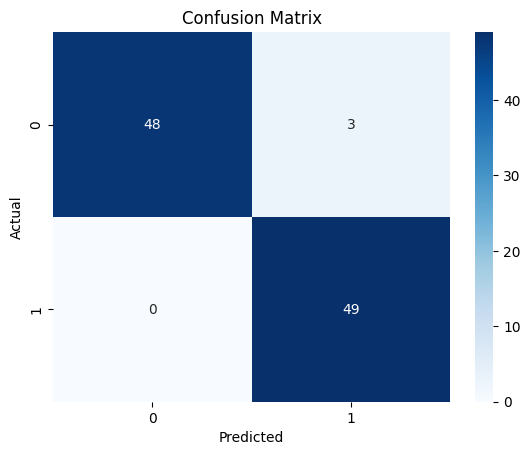

In [45]:
# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

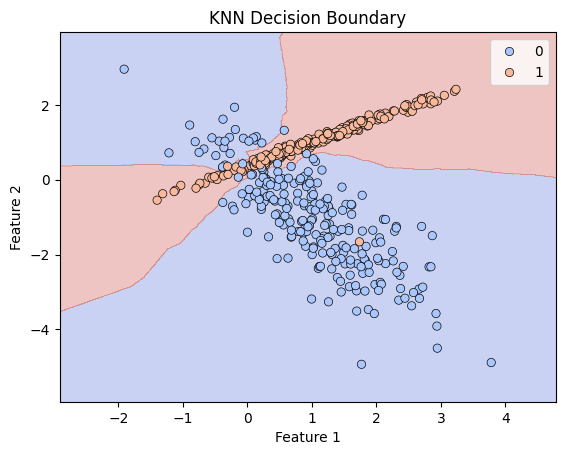

In [46]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title('KNN Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Visualize decision boundary
plot_decision_boundary(X, y, knn_model)

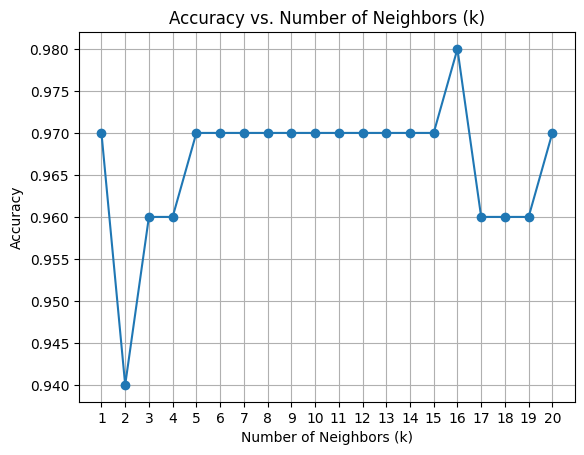

Optimal k: 16 with accuracy: 98.00%


In [47]:
# Test different values of k
accuracies = []

for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. k
plt.plot(range(1, 21), accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid()
plt.show()

optimal_k = np.argmax(accuracies) + 1
print(f"Optimal k: {optimal_k} with accuracy: {accuracies[optimal_k - 1] * 100:.2f}%")

**Summary**

1. KNN is a simple, instance-based learning algorithm.
2. The choice of k significantly impacts the model's performance:
 * Low k: High variance, sensitive to noise.
 * High k: High bias, smoother boundaries.
3. Visualization of decision boundaries aids understanding of KNN’s classification behavior.